<a href="https://colab.research.google.com/github/Mukti-J/Exercise/blob/main/Tugas4ML/Tugas_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
!pip3 install -U ucimlrepo

In [220]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix, accuracy_score

In [156]:
# Load dataset
liver_disorders = fetch_ucirepo(id=60)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# Gabung Fitur & Target, Buat Label Biner
df = X.copy()
df['drinks'] = y['drinks']
threshold = 3
df['liver_disorder'] = (df['drinks'] >= threshold).astype(int)

# Info & Distribusi Data
print("Info DataFrame:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nDistribusi Label biner (liver_disorder):")
print(df['liver_disorder'].value_counts())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mcv             345 non-null    int64  
 1   alkphos         345 non-null    int64  
 2   sgpt            345 non-null    int64  
 3   sgot            345 non-null    int64  
 4   gammagt         345 non-null    int64  
 5   drinks          345 non-null    float64
 6   liver_disorder  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB
None

Statistik Deskriptif:
              mcv     alkphos        sgpt        sgot     gammagt      drinks  \
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000   
mean    90.159420   69.869565   30.405797   24.643478   38.284058    3.455072   
std      4.448096   18.347670   19.512309   10.064494   39.254616    3.337835   
min     65.000000   23.000000    4.000000    5.000000    5.000000    0.0

# **Pertanyaan 1**

Bagaimana distribusi masing-masing fitur (mcv, alkphos, sgpt, sgot, gammagt, drinks) pada seluruh data?

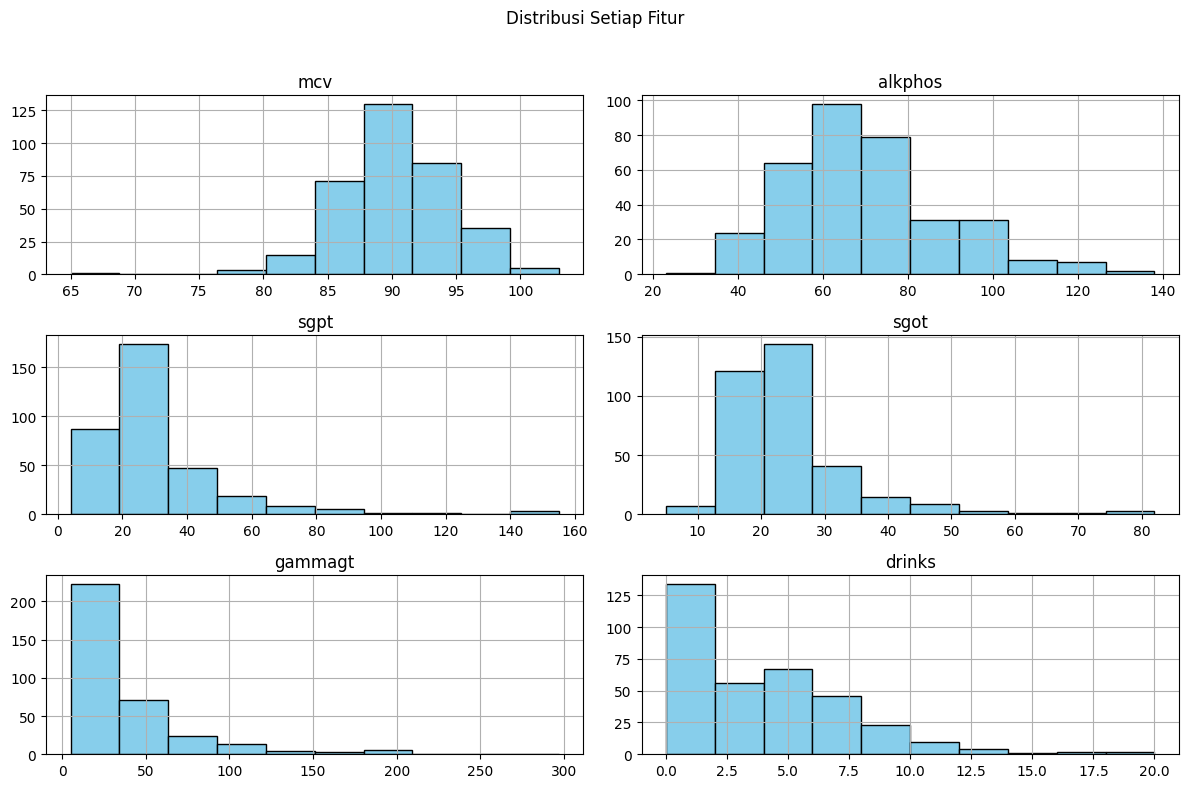

In [157]:
df.drop(columns='liver_disorder').hist(figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# **Pertanyaan 2**

Apakah terdapat korelasi yang kuat antara fitur-fitur tertentu dengan label gangguan liver?

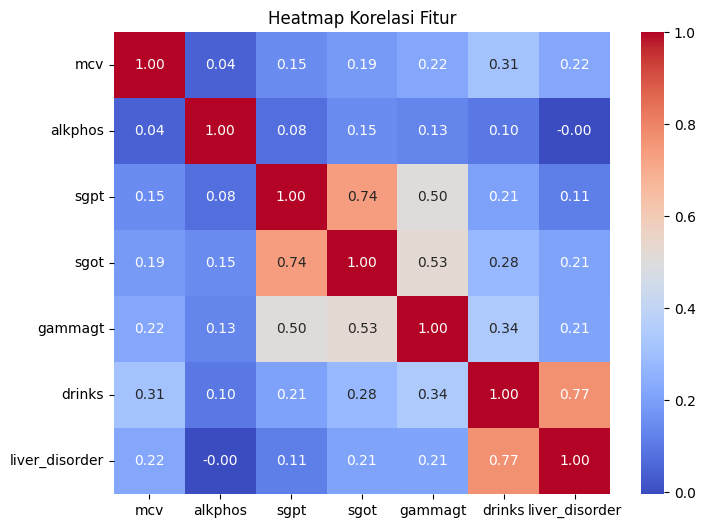

In [159]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

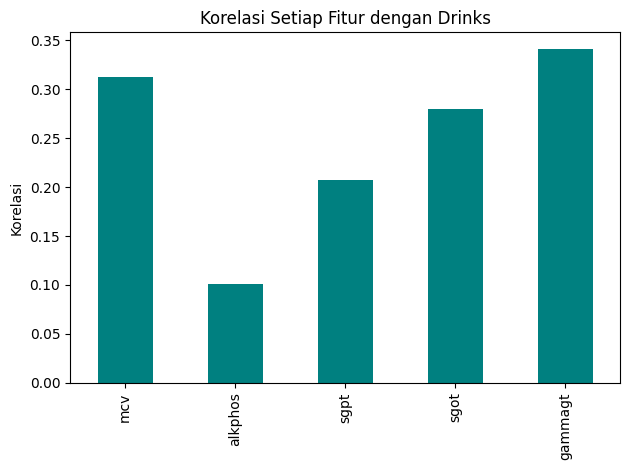

In [160]:
# Korelasi fitur dengan drinks (tanpa drinks & label biner)
drinks_corr = corr['drinks'].drop(['drinks', 'liver_disorder'], errors='ignore')
drinks_corr.plot(kind='bar', color='teal')
plt.title('Korelasi Setiap Fitur dengan Drinks')
plt.ylabel('Korelasi')
plt.tight_layout()
plt.show()

# **Pertanyaan 3**

Apakah terdapat outlier pada fitur-fitur utama, dan bagaimana pengaruhnya terhadap label?

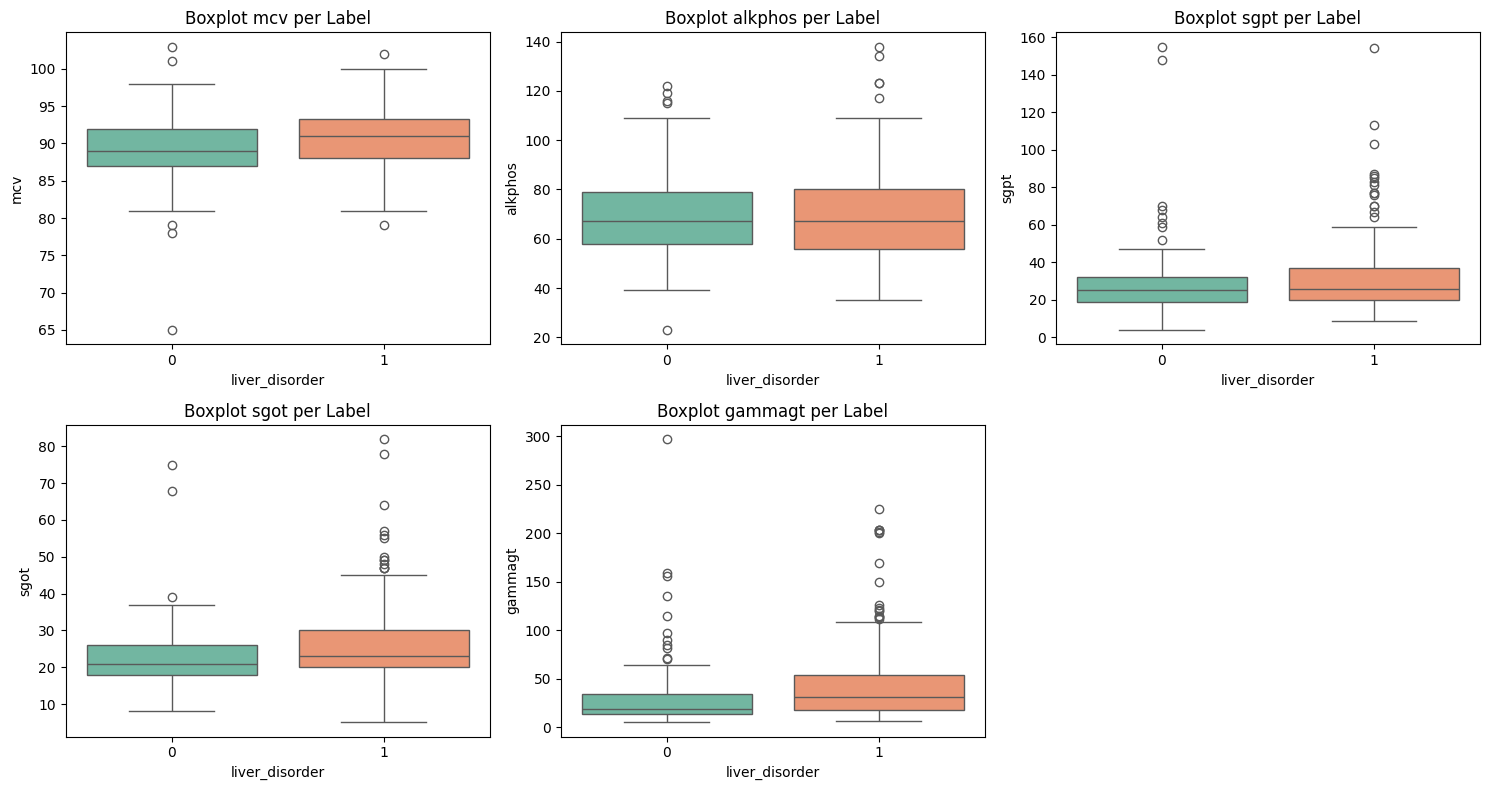

In [165]:
plt.figure(figsize=(15,8))
for i, col in enumerate(X.columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='liver_disorder', y=col, data=df, palette='Set2', hue='liver_disorder', dodge=False, legend=False)
    plt.title(f'Boxplot {col} per Label')
plt.tight_layout()
plt.show()

# **Pertanyaan 4**

Bagaimana perbedaan statistik deskriptif (mean, median, std, min, max) fitur-fitur antara pasien dengan gangguan liver dan tanpa gangguan liver?

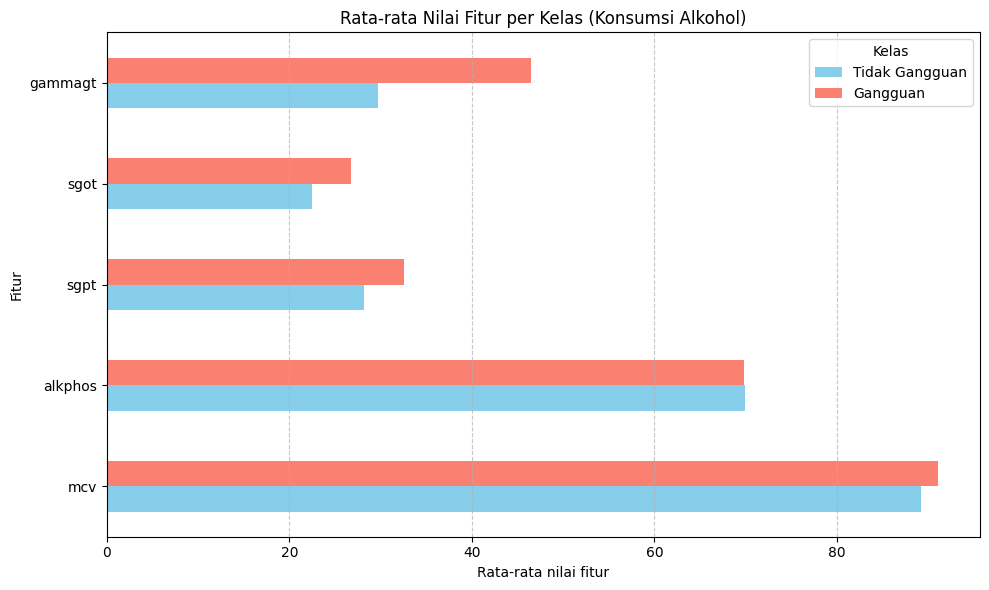

In [167]:
mean_per_class = df.groupby('liver_disorder').mean().T
plt.figure(figsize=(10, 6))
mean_per_class.drop(['liver_disorder', 'drinks'], errors='ignore').plot(kind='barh', ax=plt.gca(), color=['skyblue','salmon'])
plt.xlabel('Rata-rata nilai fitur')
plt.ylabel('Fitur')
plt.title('Rata-rata Nilai Fitur per Kelas (Konsumsi Alkohol)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Tidak Gangguan', 'Gangguan'], title='Kelas', loc='upper right')
plt.tight_layout()
plt.show()

# **Pertanyaan 5**

Apakah konsumsi alkohol (“drinks”) signifikan berhubungan dengan gangguan liver?

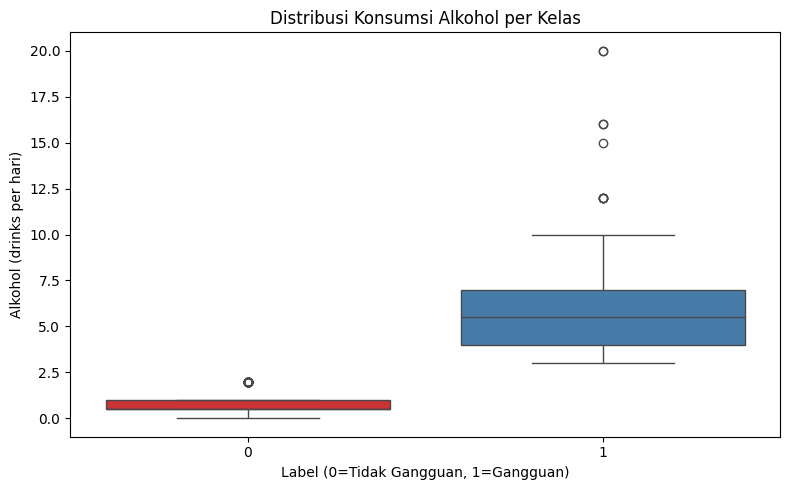

In [172]:
plt.figure(figsize=(8,5))
sns.boxplot(x='liver_disorder', y='drinks', data=df, palette='Set1', hue='liver_disorder', dodge=False, legend=False)
plt.title('Distribusi Konsumsi Alkohol per Kelas')
plt.xlabel('Label (0=Tidak Gangguan, 1=Gangguan)')
plt.ylabel('Alkohol (drinks per hari)')
plt.tight_layout()
plt.show()

# **Pertanyaan 6**

Fitur mana yang paling berkontribusi dalam membedakan pasien dengan dan tanpa gangguan liver?

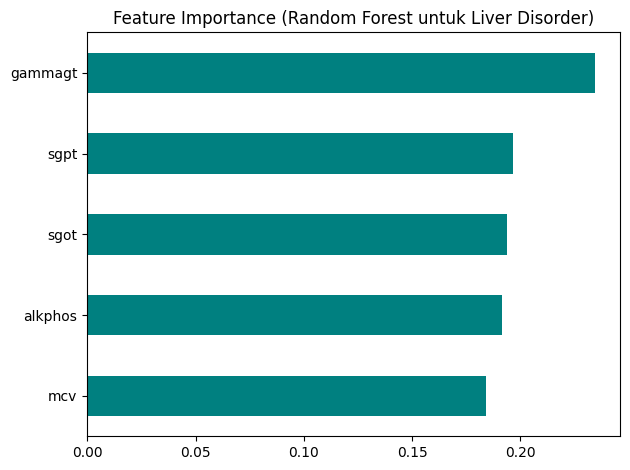

In [177]:
X_feat = df[X.columns]
y_label = df['liver_disorder']
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_label, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest untuk Liver Disorder)')
plt.tight_layout()
plt.show()

# **Pertanyaan 7**

Adakah kombinasi fitur yang membedakan dua kelompok secara visual?

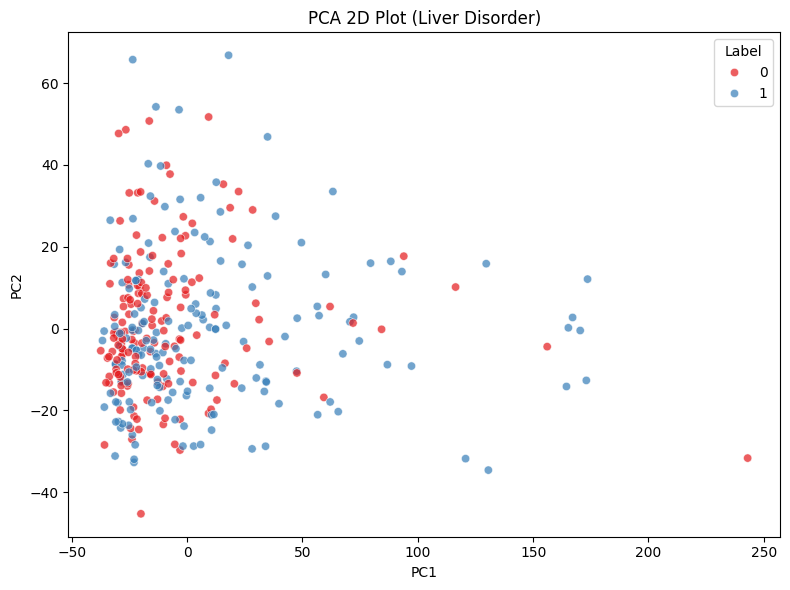

In [178]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_feat)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_label, palette='Set1', alpha=0.7)
plt.title('PCA 2D Plot (Liver Disorder)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# **Pertanyaan 8**

Apakah terdapat hubungan linier/multilinier antar fitur?

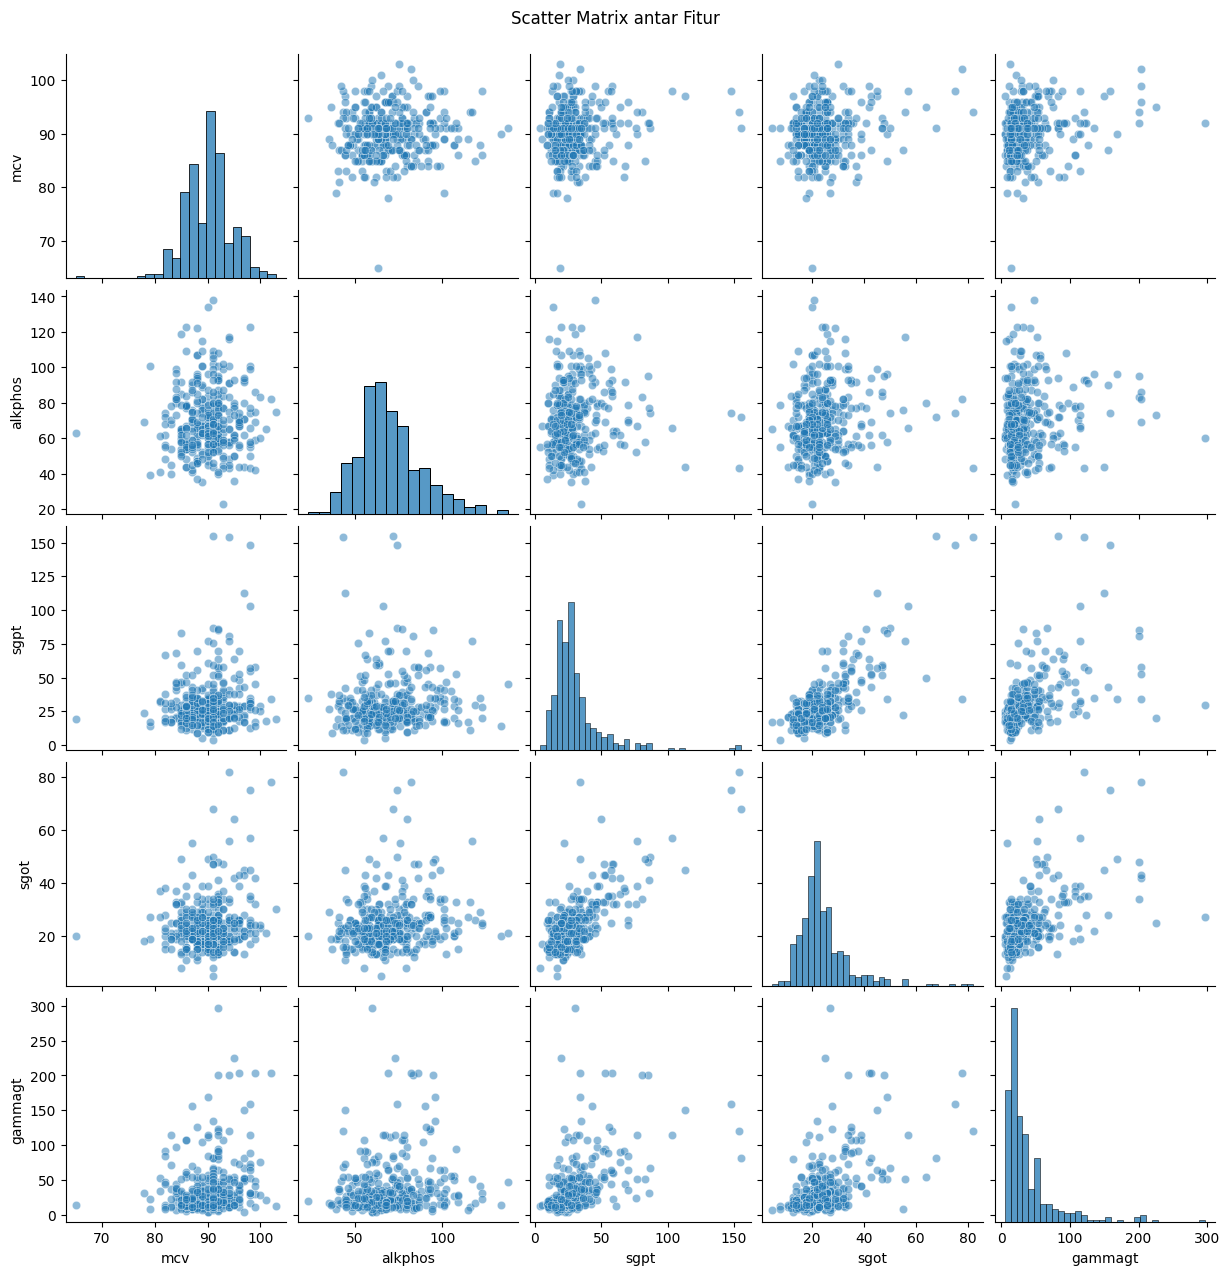

In [179]:
sns.pairplot(df[X.columns], plot_kws={'alpha':0.5})
plt.suptitle('Scatter Matrix antar Fitur', y=1.02)
plt.show()

# **Pertanyaan 9**

Adakah pola konsumsi alkohol tertentu (contoh: drinks > 3) yang mendominasi pada pasien dengan gangguan liver?

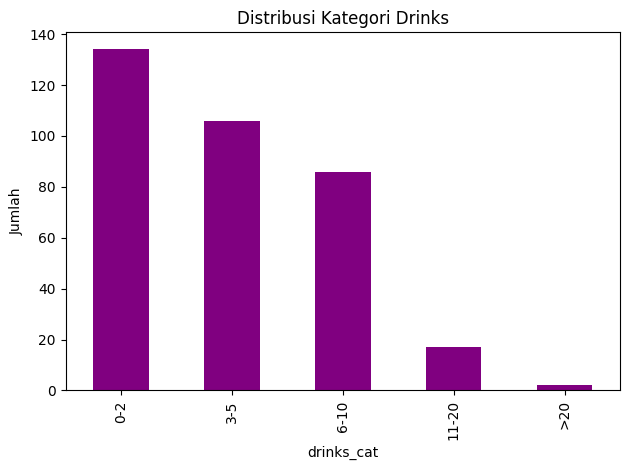

In [187]:
bins = [0, 2, 5, 10, 20, df['drinks'].max() + 1]
labels = ['0-2', '3-5', '6-10', '11-20', '>20']
df['drinks_cat'] = pd.cut(df['drinks'], bins=bins, labels=labels, include_lowest=True, right=False)
df['drinks_cat'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribusi Kategori Drinks')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# **Pertanyaan 10**
